# Feature Transformation and Scaling

## Importing and loading data

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

print(pd.__version__)
print(np.__version__)

2.1.3
1.26.1


In [2]:
# Loading the data
data = pd.read_csv('datasets/train_bm.csv')

# Checking the data
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# Shape and columns of the data
print('Shape:', data.shape)
print('Columns:', data.columns)

Shape: (8523, 12)
Columns: Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


## Feature Transformation

- Feature transformation is done to transform the data from one form to another form, keeping the essence of the data.
- It is the process of modifying or converting input features in a dataset to improve the performance of a machine learning model.

### Data visualization

<Axes: >

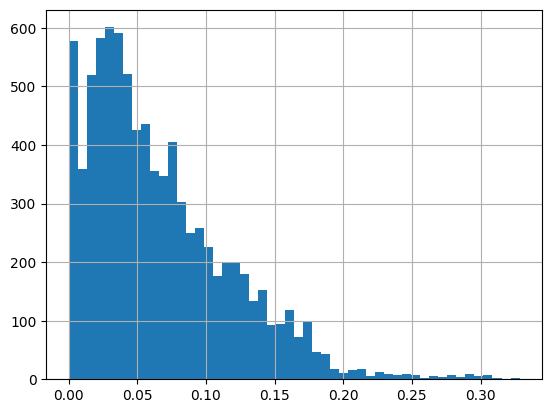

In [4]:
# Plotting a histogram with bins = 50
data['Item_Visibility'].hist(bins=50)

We can see that its a right skewed distribution. In this case we can take the root or apply log function. Lets try using a square root.

<Axes: >

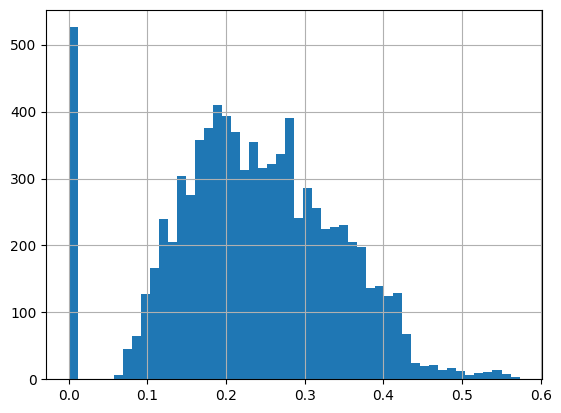

In [5]:
# Taking the square root of the column
item_visibility_new = np.sqrt(data['Item_Visibility'])

# Plotting histogram
item_visibility_new.hist(bins = 50)

The resultant is a normal distribution. Now lets use the log function. The minimum value we have is 0, and log(0) is not defined. Thus it will show an error. Hence, it is okay to add 0.1 to each value and then take the log.

In [8]:
# Describe the data
data['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

<Axes: >

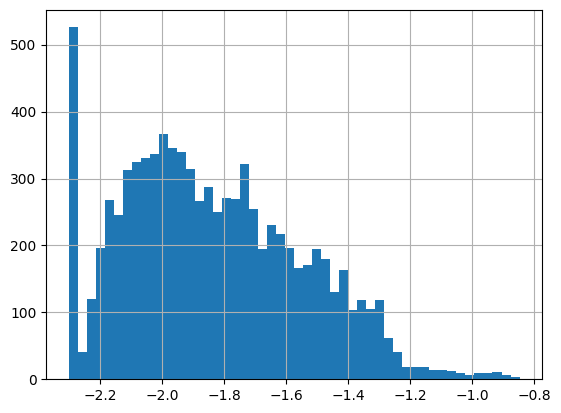

In [9]:
# log of the data
item_visibility_log = np.log(data['Item_Visibility'] + 0.1)
item_visibility_log.hist(bins=50)

Here we get the visibility in negatives. This is because the values in the column are less than 1.

## Feature Scaling

- Feature scaling is a method used to normalize the range of independent variables or features of data.
- In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

In [10]:
# Filter numerical data
numerical_data = data[['Item_Visibility', 'Item_MRP']]
numerical_data.head()

,Item_Visibility,Item_MRP
0,0.016047,249.8092
1,0.019278,48.2692
2,0.016760,141.6180
3,0.000000,182.0950
4,0.000000,53.8614


### MinMaxScaler

Transform features by scaling each feature to a given range.

In [11]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Scaling the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numerical_data)
scaled_data = pd.DataFrame(scaled_data, columns = ['Item_Visibility', 'Item_MRP'])

# Checking the data
scaled_data.head()

,Item_Visibility,Item_MRP
0,0.048866,0.927507
1,0.058705,0.072068
2,0.051037,0.468288
3,0.000000,0.640093
4,0.000000,0.095805


### StandardScaler
Standardize features by removing the mean and scaling to unit variance.

In [12]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)
scaled_data = pd.DataFrame(scaled_data, columns = ['Item_Visibility', 'Item_MRP'])

# Checking the data
scaled_data.head()

,Item_Visibility,Item_MRP
0,-0.970732,1.747454
1,-0.908111,-1.489023
2,-0.956917,0.010040
3,-1.281758,0.660050
4,-1.281758,-1.399220
